# **Netflix Movies & TV shows Clustering -Unsupervised Learning**

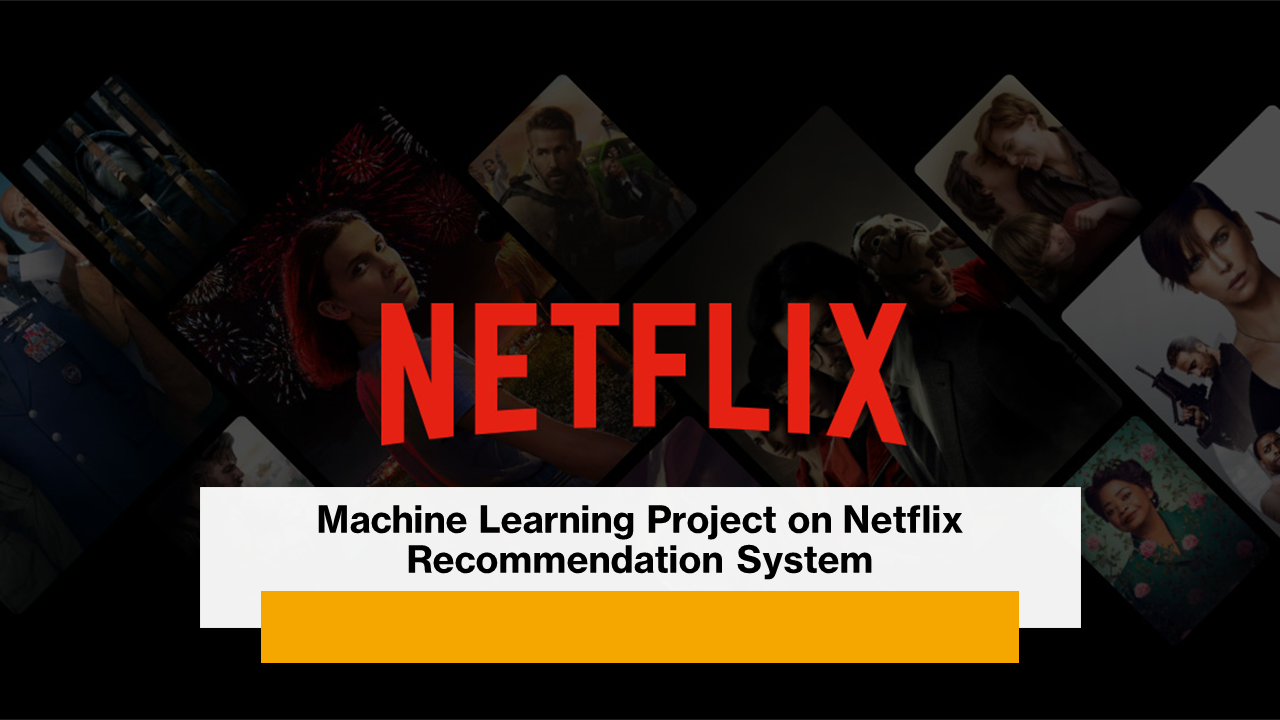

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **GitHub Link -**

# **Problem Statement**


**This dataset includes TV shows and movies available on Netflix as of 2019, collected from Flixable, a third-party Netflix search engine.**

**In 2018, Flixable released a report showing that since 2010, the number of TV shows on Netflix has nearly tripled, while the number of movies has dropped by over 2,000 titles. It will be interesting to explore what other insights can be discovered from this dataset.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [6]:
# Import Libraries

# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
import plotly.io as pio

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')


In [7]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


### Dataset Loading

In [8]:
# Load Dataset
df = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [9]:
# Dataset First Look
df.head(2)

show_id     type title           director  \
0      s1  TV Show    3%                NaN   
1      s2    Movie  7:19  Jorge Michel Grau   

                                                cast country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Mexico   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...

### Dataset Rows & Columns count

In [10]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
df.shape

(7787, 12)

### Dataset Information

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [13]:
df.duplicated().sum()

0

#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [15]:
df['cast'].fillna(value='No cast',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

### What did you know about your dataset?

This dataset contain information about various TV shows and movies available on Netflix, including details like the production country, release year, rating, duration, genre, and a description of each title. It consists of 12 columns and 7787 rows.

## ***2. Understanding Your Variables***

In [16]:
# Dataset Describe
df.describe(include='all')

show_id   type title                director     cast        country  \
count     7787   7787  7787                    5398     7787           7787   
unique    7787      2  7787                    4049     6832            681   
top         s1  Movie    3%  Raúl Campos, Jan Suter  No cast  United States   
freq         1   5377     1                      18      718           3062   
mean       NaN    NaN   NaN                     NaN      NaN            NaN   
std        NaN    NaN   NaN                     NaN      NaN            NaN   
min        NaN    NaN   NaN                     NaN      NaN            NaN   
25%        NaN    NaN   NaN                     NaN      NaN            NaN   
50%        NaN    NaN   NaN                     NaN      NaN            NaN   
75%        NaN    NaN   NaN                     NaN      NaN            NaN   
max        NaN    NaN   NaN                     NaN      NaN            NaN   

             date_added  release_year rating  duration      listed_in  \
count              7777   7787.000000   7780      7787           7787   
unique             1565           NaN     14       216            492   
top     January 1, 2020           NaN  TV-MA  1 Season  Documentaries   
freq                118           NaN   2863      1608            334   
mean                NaN   2013.932580    NaN       NaN            NaN   
std                 NaN      8.757395    NaN       NaN            NaN   
min                 NaN   1925.000000    NaN       NaN            NaN   
25%                 NaN   2013.000000    NaN       NaN            NaN   
50%                 NaN   2017.000000    NaN       NaN            NaN   
75%                 NaN   2018.000000    NaN       NaN            NaN   
max                 NaN   2021.000000    NaN       NaN            NaN   

                                              description  
count                                                7787  
unique                                               7769  
top     Multiple women report their husbands as missin...  
freq                                                    3  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

### Variables Description

show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genere

description: The Summary descriptionAnswer Here

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
print(df.apply(lambda col: col.unique()))

show_id         [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...
type                                             [TV Show, Movie]
title           [3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19...
director        [nan, Jorge Michel Grau, Gilbert Chan, Shane A...
cast            [João Miguel, Bianca Comparato, Michel Gomes, ...
country         [Brazil, Mexico, Singapore, United States, Tur...
date_added      [August 14, 2020, December 23, 2016, December ...
release_year    [2020, 2016, 2011, 2009, 2008, 2019, 1997, 201...
rating          [TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y...
duration        [4 Seasons, 93 min, 78 min, 80 min, 123 min, 1...
listed_in       [International TV Shows, TV Dramas, TV Sci-Fi ...
description     [In a future where the elite inhabit an island...
dtype: object


## **3.** ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Create new features to store date, day, month and year seperately.
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day            # Compute day.
df['year_added'] = df['date_added'].dt.year          # Compute year.
df['month_added'] = df['date_added'].dt.month        # Compute month.

### What all manipulations have you done and insights you found?

Director: There are missing values in the "Director" column.

Country: There are missing values in the "Country" column, which have been filled with zero.

Cast: There are missing values in the "Cast" column, which have been filled with "No cast."

Date Added: There are missing values in the "Date Added" column.

Duplicated entries have been identified in the dataset,sum is zero.Unique Values also in each column has to find unique items from different columns.

Date_addded Column: In the "Date Added" column, additional information has been extracted such as the day, month, and year.Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [19]:
# Chart - 1 visualization code
labels = ['TV Show', 'Movie']
values = [df.type.value_counts()[1], df.type.value_counts()[0]]

# Colors
colors = ['#ffd700', '#008000']

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])

# Customize layout
fig.update_layout(
    title_text='Type of Content Watched on Netflix',
    title_x=0.5,
    height=500,
    width=500,
    legend=dict(x=0.9),
    annotations=[dict(text='Type of Content', font_size=20, showarrow=False)]
)

# Set colors
fig.update_traces(marker=dict(colors=colors))


##### 1. Why did you pick the specific chart?

The specific chart used in the code is a pie chart. I picked this chart because it is effective in visualizing the distribution of categorical data. In this case, the chart is used to represent the types of content watched on Netflix, which are categorized as "TV Show" and "Movie."Answer Here.

#### Chart - 2

In [20]:
import plotly.graph_objects as go
import pandas as pd
tv_show = df[df["type"] == "TV Show"]
movie = df[df["type"] == "Movie"]

col = "year_added"

content_1 = tv_show["year_added"].value_counts().sort_index()
content_2 = movie["year_added"].value_counts().sort_index()

trace1 = go.Scatter(x=content_1.index, y=content_1.values, name="TV Shows", marker=dict(color='#008000', line=dict(width=4)))
trace2 = go.Scatter(x=content_2.index, y=content_2.values, name="Movies", marker=dict(color='#ffd700', line=dict(width=4)))

fig = go.Figure(data=[trace1, trace2], layout=go.Layout(title="Content added over the years",title_x=0.5, legend=dict(x=0.8, y=1.1, orientation="h")))
# Display chart
fig.show()

##### 1. Why did you pick the specific chart?

The line chart is suitable for showing the trend and distribution of data over a continuous axis (in this case, the years). It allows for easy comparison between the two categories (TV shows and movies) and how their counts vary over time.Answer Here.

### Chart - 3

In [21]:
months_df = df['month_added'].value_counts().reset_index()

# Rename the columns to "month" and "count"
months_df.columns = ['month', 'count']


In [22]:
print(months_df)

    month  count
0    12.0    833
1    10.0    785
2     1.0    757
3    11.0    738
4     3.0    669
5     9.0    619
6     8.0    618
7     4.0    601
8     7.0    600
9     5.0    543
10    6.0    542
11    2.0    472


In [23]:
fig = px.bar(months_df, x="month", y="count", text_auto=True, color='count', color_continuous_scale=['#0000FF', '#FFFF00'])
fig.update_layout(
    title={
        'text': 'Month wise Addition of Movies and TV Shows on Netflix',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1000,
        height=500,
        showlegend=True)
# fig.show()
fig.show()

##### 1. Why did you pick the specific chart?

The bar chart is suitable for comparing and displaying categorical data (months) and their corresponding counts. The chart helps in understanding the distribution of content additions across different months and identifying any patterns or trends.Answer Here.

#### Chart - 4  Count Plot

<AxesSubplot:xlabel='month_added', ylabel='count'>

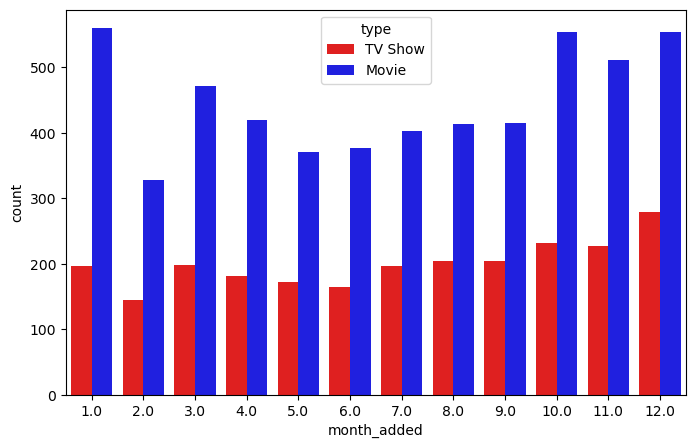

In [19]:
# Chart - 4 visualization code
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='month_added', hue='type',lw=5, data=df, ax=ax,palette=['#FF0000' ,'#0000FF'])

##### 1. Why did you pick the specific chart?

By using a countplot, we can easily see and compare the frequencies of TV show and movie additions for each month.Answer Here.

#### Chart - 5 - Correlation Heatmap

In [26]:
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)

In [27]:
df.head(2)

show_id     type title           director  \
0      s1  TV Show    3%                NaN   
1      s2    Movie  7:19  Jorge Michel Grau   

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Mexico 2016-12-23   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   
1  After a devastating earthquake hits Mexico Cit...       23.0      2016.0   

   month_added  count target_ages  
0          8.0      1      Adults  
1         12.0      1      Adults

In [28]:
# Preparing data for heatmap
df['count'] = 1

# Group by country and sum the count, no need to include 'country' inside the groupby
data = df.groupby('country')['count'].sum().sort_values(ascending=False).reset_index()[:10]

# Extracting the top 10 countries
data = data['country']

# Filter the main dataframe for the top 10 countries
df_heatmap = df[df['country'].isin(data)]

# Create a crosstab for the heatmap data
df_heatmap = pd.crosstab(df_heatmap['country'], df_heatmap['target_ages'], normalize="index").T

df_heatmap

country        Canada     Egypt    France     India     Japan  Mexico  \
target_ages                                                             
Adults       0.446328  0.277228  0.678261  0.255688  0.364444    0.77   
Kids         0.180791  0.000000  0.095652  0.016251  0.008889    0.02   
Older Kids   0.225989  0.039604  0.060870  0.160347  0.271111    0.07   
Teens        0.146893  0.683168  0.165217  0.567714  0.355556    0.14   

country      South Korea     Spain  United Kingdom  United States  
target_ages                                                        
Adults          0.469945  0.835821        0.513854       0.471550  
Kids            0.027322  0.022388        0.093199       0.089601  
Older Kids      0.120219  0.044776        0.204030       0.195553  
Teens           0.382514  0.097015        0.188917       0.243296

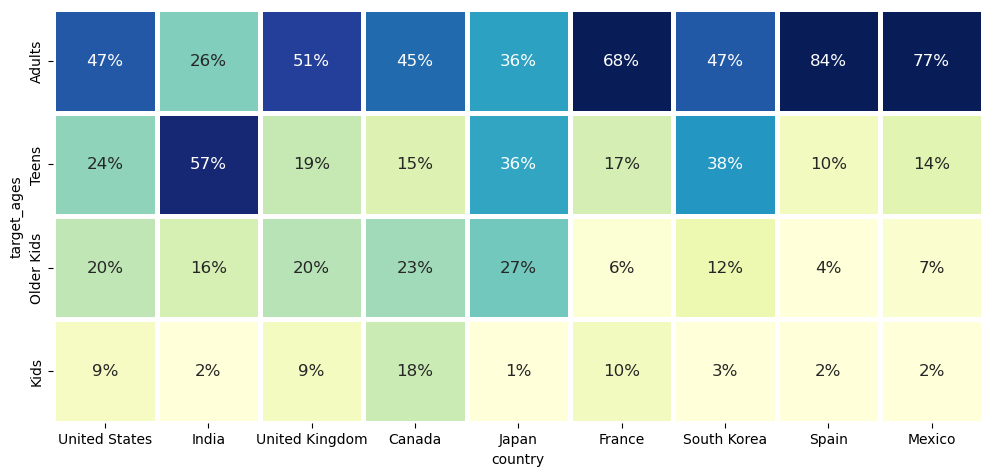

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap.loc[age_order, country_order2],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is a suitable choice when visualizing the relationships between two categorical variables, in this case, countries and age groups. It allows for a clear representation of patterns, trends, and comparisons across different categories.Answer Here.

## ***5. Hypothesis Testing***

In [31]:
#making copy of df_clean_frame
netflix_hypothesis=df.copy()
#head of df_hypothesis
netflix_hypothesis.head(2)

show_id     type title           director  \
0      s1  TV Show    3%                NaN   
1      s2    Movie  7:19  Jorge Michel Grau   

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Mexico 2016-12-23   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   
1  After a devastating earthquake hits Mexico Cit...       23.0      2016.0   

   month_added  count target_ages  
0          8.0      1      Adults  
1         12.0      1      Adults

In [32]:
netflix_hypothesis['duration']= netflix_hypothesis['duration'].str.extract('(\d+)')
netflix_hypothesis['duration'] = pd.to_numeric(netflix_hypothesis['duration'])

In [33]:
netflix_hypothesis['type'] = pd.Categorical(netflix_hypothesis['type'], categories=['Movie','TV Show'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
#df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
#df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
netflix_hypothesis.head(3)

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   

                                                cast    country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...     Brazil 2020-08-14   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico 2016-12-23   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore 2018-12-20   

   release_year rating  duration  \
0          2020  TV-MA         4   
1          2016  TV-MA        93   
2          2011      R        78   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   
1  After a devastating earthquake hits Mexico Cit...       23.0      2016.0   
2  When an army recruit is found dead, his fellow...       20.0      2018.0   

   month_added  count target_ages  
0          8.0      1      Adults  
1         12.0      1      Adults  
2         12.0      1      Adults

In [34]:
netflix_hypothesis['type'] = pd.Categorical(netflix_hypothesis['type'], categories=['Movie','TV Show'])

In [35]:
# Perform Statistical Test to obtain P-Value
#group_by duration and TYPE
group_by_= netflix_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group1=group_by_.mean().reset_index()
group1

type   duration
0    Movie  99.307978
1  TV Show   1.775934

In [36]:
netflix_hypothesis.groupby('type')['duration'].count()

type
Movie      5377
TV Show    2410
Name: duration, dtype: int64

In [37]:
#In A and B variable grouping values
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std
M1 = A.select_dtypes(include='number').mean()
S1 = A.select_dtypes(include='number').std()

M2 = B.select_dtypes(include='number').mean()
S2 = B.select_dtypes(include='number').std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  duration    99.307978
dtype: float64
Std  duration    1.596359
dtype: float64


In [38]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

5377 2410
dof 7785
SP_2 = duration    253.64841
dtype: float64
SP duration    15.926343
dtype: float64
tvalue 249.81856492927673


Which statistical test have you done to obtain P-Value?


t-distribution





## ***6. Feature Engineering & Data Pre-processing***

In [39]:
df2 = df.copy()

In [40]:
# Combining all the clustering attributes into a single column
df['clustering'] = (df['director'] + ' ' + df['cast'] +' ' +
                                 df['country'] +' ' + df['listed_in'] +
                                 ' ' + df['description'])


In [41]:
df['clustering'][25]

'Lyric R. Cabral, David Felix Sutcliffe No cast United States Documentaries This real-life look at FBI counterterrorism operations features access to both sides of a sting: the government informant and the radicalized target.'

### **Textual Data Preprocessing**

In [42]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('all', quiet=True)

def transform_text(text):
    # Check if the input is a string; if not, return an empty string
    if not isinstance(text, str):
        return ''

    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Tokenize text into words
    words = nltk.word_tokenize(text)

    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Remove stopwords and punctuation
    stopwords_set = set(stopwords.words('english'))
    words = [word for word in words if word not in stopwords_set]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join words into a string and return
    return ' '.join(lemmatized_words)

# Apply the function to the 'clustering' column
df['Clean_Text'] = df['clustering'].apply(transform_text)



In [43]:
df["Clean_Text"][50]

'roland emmerich steven strait camilla belle cliff curtis joel virgel affif ben badra mo zinal nathanael baring mona hammond omar sharif united state south africa action adventure fierce mammoth hunter set impossible journey rescue woman love vicious warlord save people village'

### **Text Vectorization**

**TF-IDF combines two metrics: Term frequency (TF) and inverse document frequency (IDF).**

Term Frequency (TF): This metric measures the frequency of a term in a document. It assumes that the more often a term appears in a document, the more relevant it is to that document. It is calculated using the formula:

**TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d)**

**Inverse Document Frequency (IDF): This metric measures the importance of a term across a collection of documents. It gives higher weight to terms that appear less frequently in the entire collection. It is calculated using the formula:**


**IDF(t) = log_e(Total number of documents / Number of documents containing term t)**

In [44]:
bag_of_words = df.Clean_Text

In [59]:
t_vectorizer = TfidfVectorizer(max_features=15000)
X= t_vectorizer.fit_transform(bag_of_words)

In [60]:
print(X.shape)

(7787, 15000)


In [61]:
t_vectorizer.get_feature_names_out()

array(['007', '10', '100', ..., 'şenol', 'şimşek', 'şinasi'], dtype=object)

### **Dimesionality Reduction**

**Do you think that dimensionality reduction is needed? Explain Why**

**Answer Here.**

PCA to reduce the dimensionality of the dataset. PCA identifies the directions (principal components) along which the data varies the most. These components are ordered by the amount of variance they explain in the data.

In [62]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

transformer = TruncatedSVD(n_components=6000)  # Adjust n_components as 2000
transformer.fit(X)  # Training

TruncatedSVD(n_components=6000)

In [63]:
X_sample = X[:3000:12]  # Select a subset of 1000 samples
transformer.fit(X_sample)

TruncatedSVD(n_components=6000)

**Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)**


**Answer Here**

PCA can extract the most relevant features from a dataset. It transforms the original features into a new set of uncorrelated variables called principal components. These components are linear combinations of the original features and capture the maximum amount of variation present in the data.

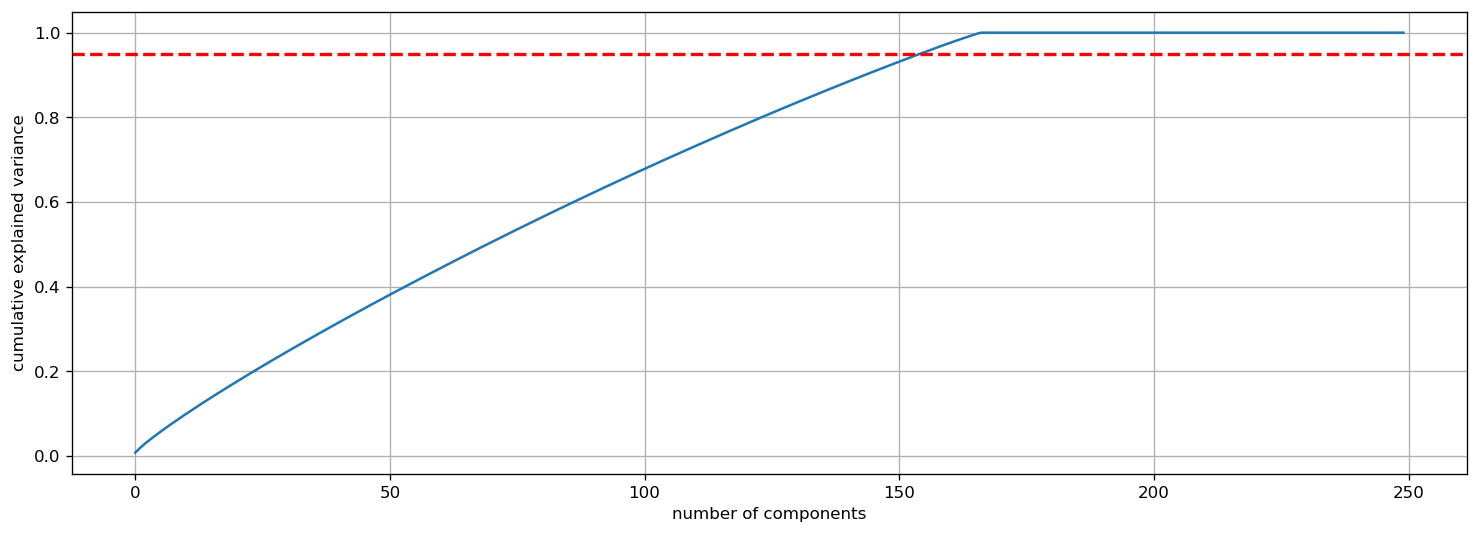

In [64]:
# Lets plot explained var v/s comp to check how many components to be considered.
 #explained var v/s comp
# Add a grid to the plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5), dpi=120)
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--',linewidth=2, label='95% Explained Variance')
plt.grid()
plt.show()

**The plot helps in determining the number of components to consider for dimensionality reduction. You can select the number of components where the cumulative explained variance reaches a satisfactory threshold, such as 95%. The point where the curve intersects or is closest to the threshold line can guide you in choosing the appropriate number of components for your analysis.**

In [67]:
from sklearn.decomposition import PCA

# Create an instance of PCA with the desired explained variance ratio
pca_tuned = PCA(n_components=1)

# Fit the PCA model on the input data
pca_tuned.fit(X)

# Transform the input data to its reduced dimensional representation
X_transformed = pca_tuned.transform(X)

# Print the shape of the transformed data to see the number of samples and transformed features
print(X_transformed.shape)


(7787, 1)


In [68]:
X_transformed

array([[-0.01750191],
       [-0.03094587],
       [-0.02813616],
       ...,
       [-0.01750191],
       [-0.01750191],
       [ 0.32271392]])

## ***7.*** **ML Model Implementation**

In [69]:
import sklearn
print(sklearn.__version__)
!pip install --upgrade scikit-learn


1.5.1
     -------------------------------------- 11.0/11.0 MB 535.8 kB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.1
    Uninstalling scikit-learn-1.5.1:
      Successfully uninstalled scikit-learn-1.5.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Sujith\\anaconda3\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



In [70]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [71]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):
    for n_clusters in range(2,n):
        km = KMeans (n_clusters=n_clusters, random_state=5)
        preds = km.fit_predict(X_transformed)
        centers = km.cluster_centers_

        score = silhouette_score(X_transformed, preds, metric='euclidean')
        print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

        visualizer = SilhouetteVisualizer(km)

        visualizer.fit(X_transformed) # Fit the training data to the visualizer
        visualizer.poof() # Draw/show/poof the data

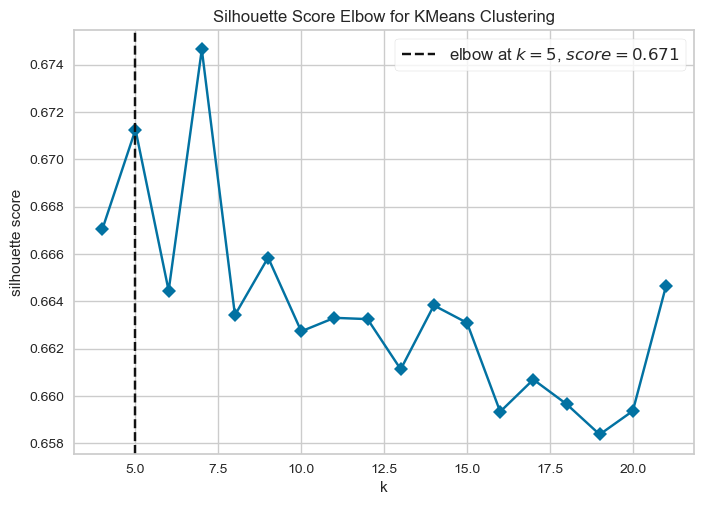

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [72]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Initialize the KMeans model with a random_state of 5
model = KMeans(random_state=5)

# Initialize the KElbowVisualizer with the KMeans model and desired parameters
visualizer = KElbowVisualizer(model, k=(4, 22), metric='silhouette', timings=False, locate_elbow=True)

# Fit the visualizer on the transformed data
visualizer.fit(X_transformed)

# Display the elbow plot
visualizer.show()

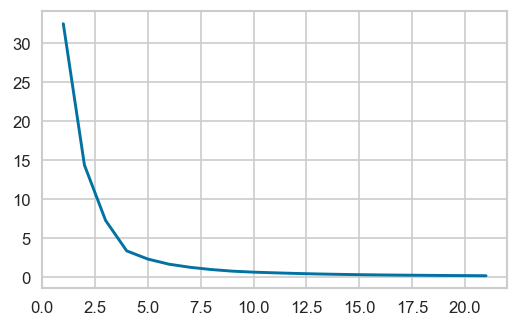

In [73]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a figure with a specific size and resolution
plt.figure(figsize=(5, 3), dpi=120)

# Initialize an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Iterate over different numbers of clusters
for i in range(1, 22):
    # Create a KMeans model with default parameters
    model = KMeans(random_state=0)

    # Initialize the KMeans algorithm with specific parameters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

    # Fit the KMeans algorithm to the transformed data
    kmeans.fit(X_transformed)

    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plot the number of clusters against the WCSS
plt.plot(range(1, 22), wcss)




In [74]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

For n_clusters = 2, silhouette score is 0.6566348564274459


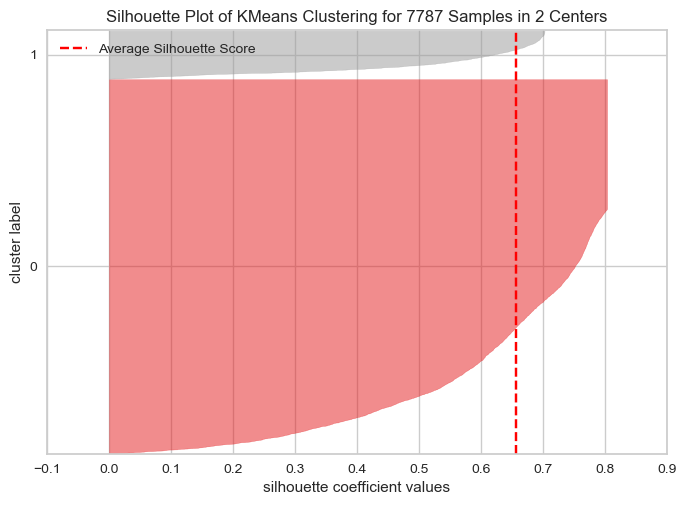

For n_clusters = 3, silhouette score is 0.5670392823808702


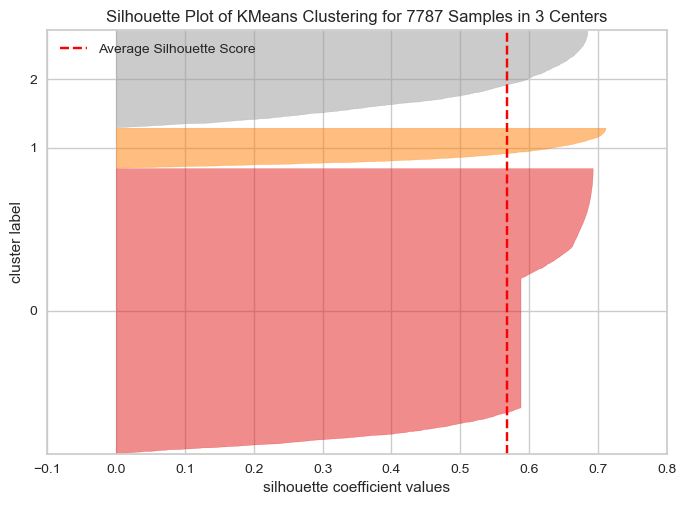

For n_clusters = 4, silhouette score is 0.6670439319399702


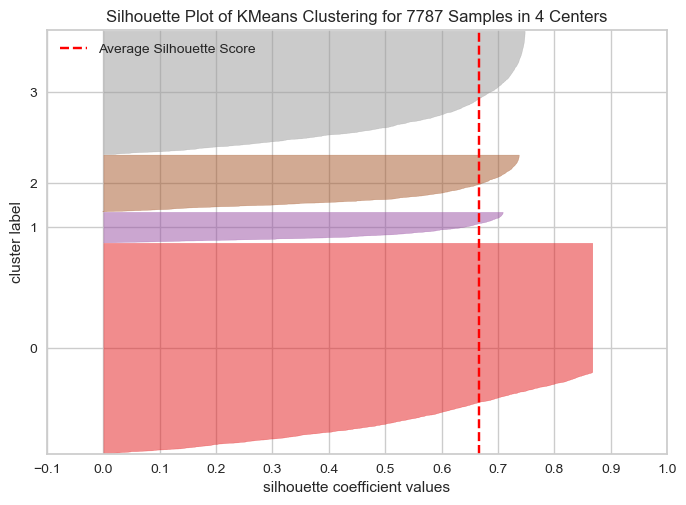

For n_clusters = 5, silhouette score is 0.6712513259031965


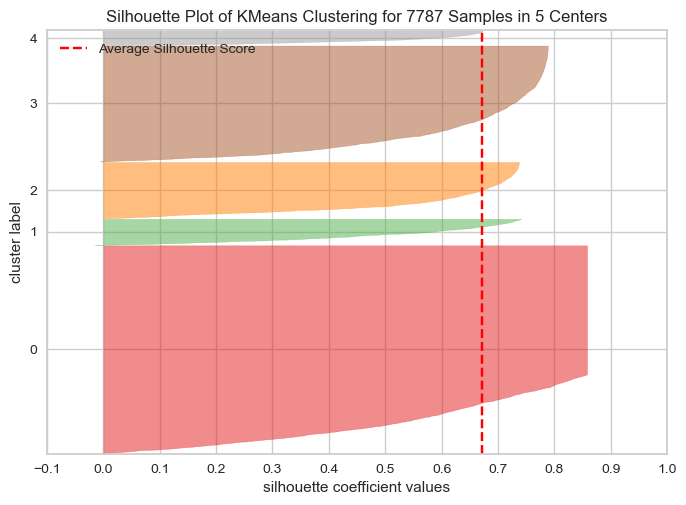

For n_clusters = 6, silhouette score is 0.6644484543480538


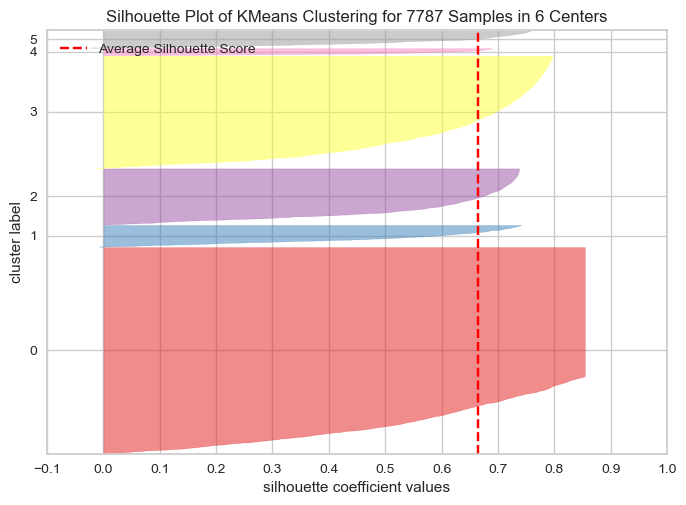

For n_clusters = 7, silhouette score is 0.6746364484591965


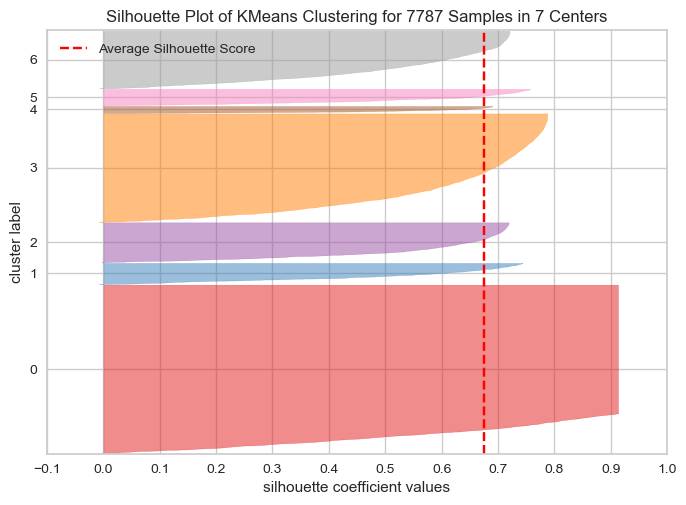

For n_clusters = 8, silhouette score is 0.6634181412590588


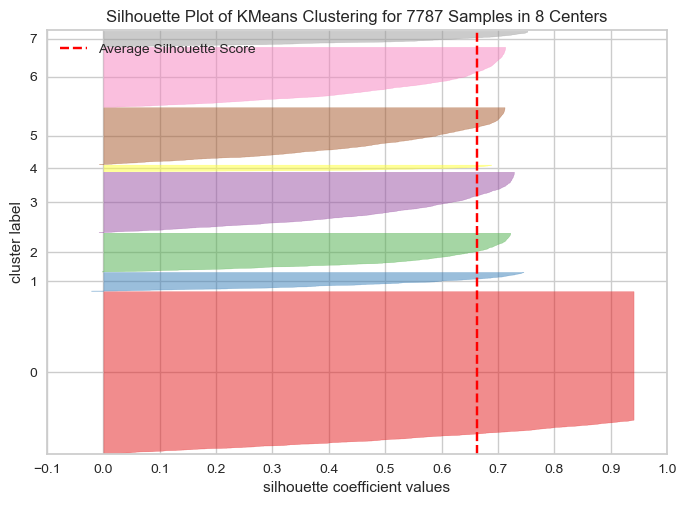

For n_clusters = 9, silhouette score is 0.6658466128578734


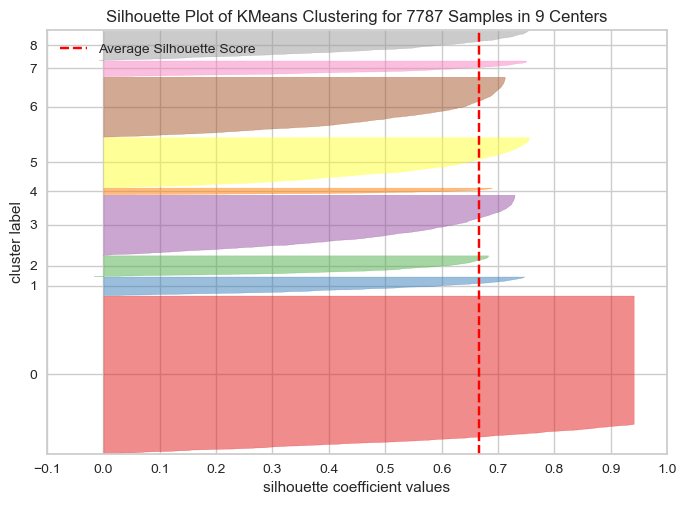

For n_clusters = 10, silhouette score is 0.6627302624045424


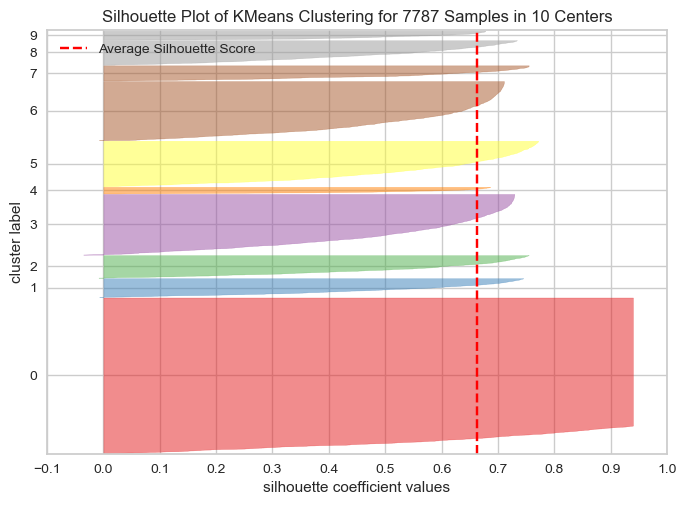

For n_clusters = 11, silhouette score is 0.6633011074404874


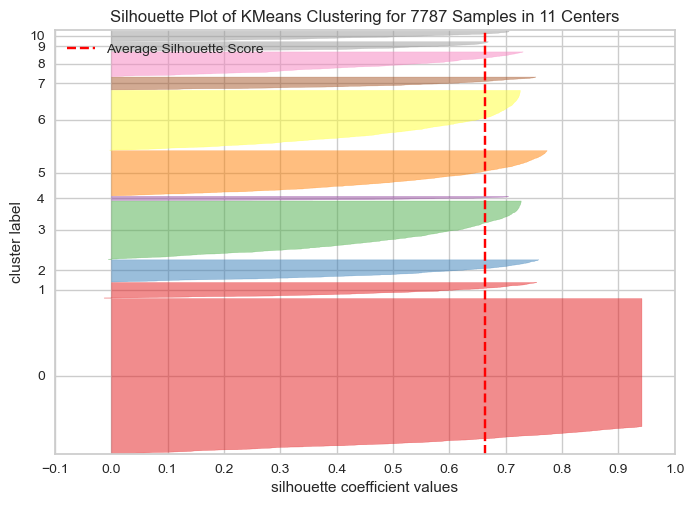

For n_clusters = 12, silhouette score is 0.6632469481832931


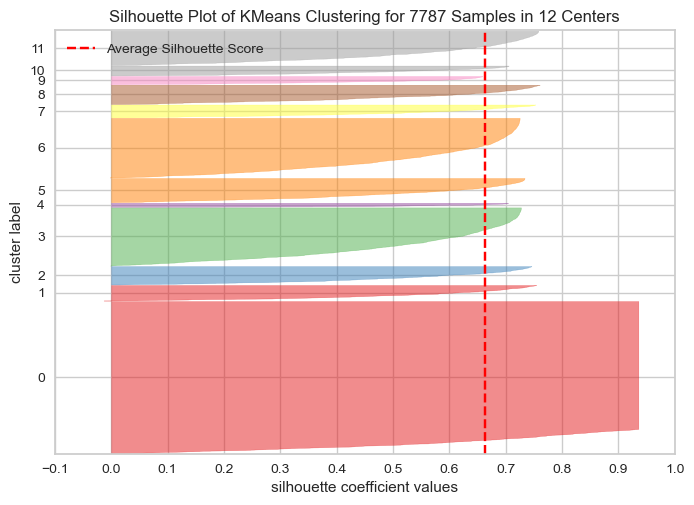

For n_clusters = 13, silhouette score is 0.6611275568903832


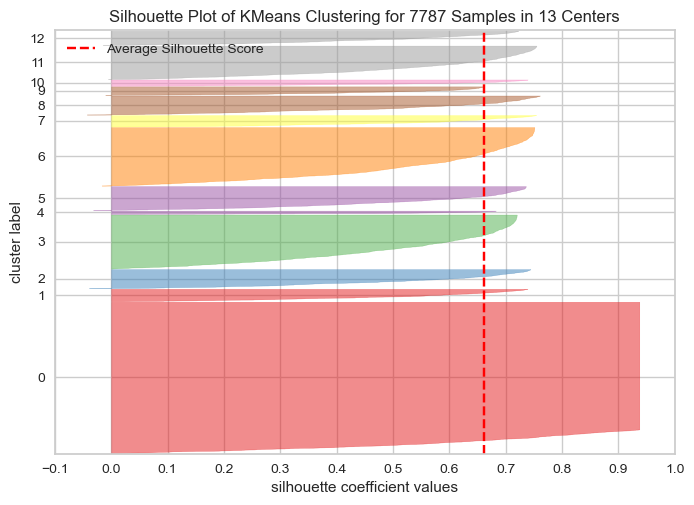

For n_clusters = 14, silhouette score is 0.663825461133324


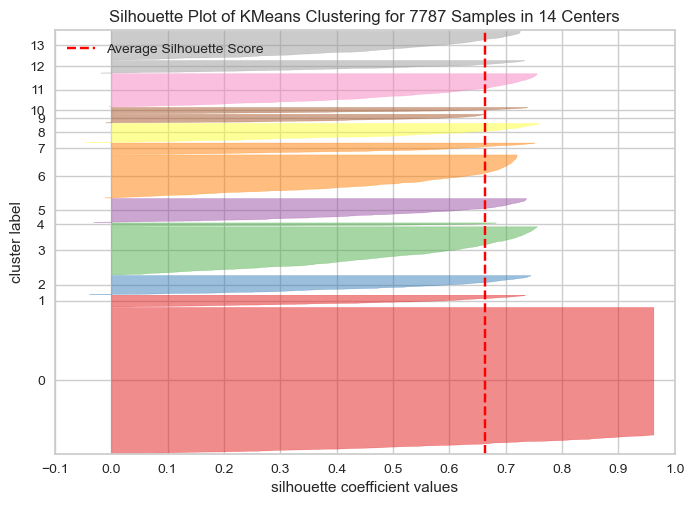

In [75]:
silhouette_score_analysis(15)

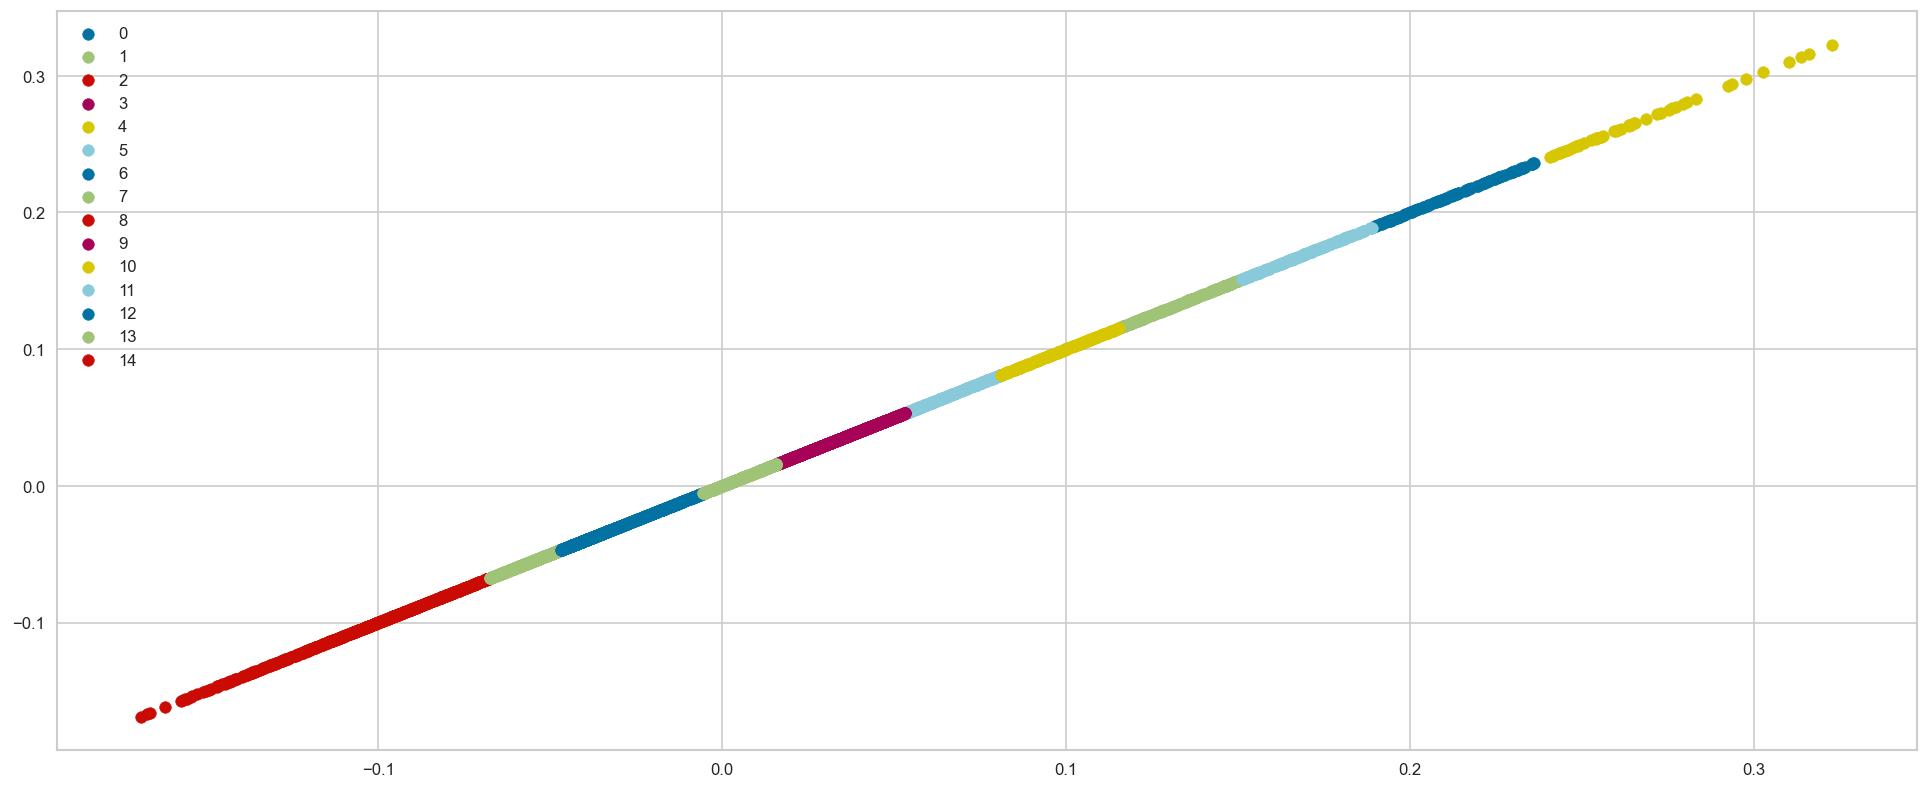

In [81]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Create a figure with a larger size and resolution
plt.figure(figsize=(20, 8), dpi=120)

# Initialize a KMeans model with 15 clusters
kmeans = KMeans(n_clusters=15, init='k-means++', random_state=9)

# Fit the KMeans algorithm to the transformed data
kmeans.fit(X_transformed)

# Predict the labels of the clusters
label = kmeans.fit_predict(X_transformed)

# Get unique labels from the predictions
unique_labels = np.unique(label)

# Plot the results
for i in unique_labels:
    # Scatter plot the points belonging to each cluster
    plt.scatter(X_transformed[label == i, 0], X_transformed[label == i], label=i)

# Display a legend to identify the clusters
plt.legend()

# Show the plot
plt.show()


In [82]:
# Add cluster values to the dateframe.
df['cluster_number'] = kmeans.labels_
df.head(2)

show_id     type title           director  \
0      s1  TV Show    3%                NaN   
1      s2    Movie  7:19  Jorge Michel Grau   

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Mexico 2016-12-23   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   
1  After a devastating earthquake hits Mexico Cit...       23.0      2016.0   

   month_added  count target_ages  \
0          8.0      1      Adults   
1         12.0      1      Adults   

                                          clustering  \
0                                                NaN   
1  Jorge Michel Grau Demián Bichir, Héctor Bonill...   

                                          Clean_Text  cluster_number  
0                                                                  0  
1  jorge michel grau demián bichir héctor bonilla...              12

In [83]:
# Count the number of movies or TV shows in each cluster
cluster_content_count = df['cluster_number'].value_counts().reset_index().rename(columns={'index': 'clusters', 'clusters': 'Movies/TV_Shows'})

# Print the cluster content count
print(cluster_content_count)


    clusters  cluster_number
0          0            2732
1          9             855
2          3             800
3         12             633
4         13             495
5          7             450
6          2             361
7         14             345
8          5             270
9         10             208
10         1             184
11        11             154
12         8             153
13         6             100
14         4              47


# **8-** **Recommender system**

**Content-based filtering:** This approach recommends items similar to the ones a user has liked or interacted with in the past. It analyzes the content or attributes of items and finds similar items to recommend. For example, if a user enjoys watching action movies, the system may recommend other action movies based on genre, actors, or plot.


In [84]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [85]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['description'] = df['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(7787, 17905)

In [88]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.05827946, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.09600035, 0.        ,
        0.        ],
       [0.05827946, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.09600035, 0.        , ..., 1.        , 0.        ,
        0.02819239],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02819239, 0.        ,
        1.        ]])

In [89]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [90]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [91]:
get_recommendations('Get In',cosine_sim)

2123                  Fatal Affair
7622             Wild Wild Country
7325             Uncle Naji in UAE
5286           Roswell, New Mexico
6937                      The Trap
2405                 Ghosts of War
6440    The Haunting of Hill House
3636             Light in the Dark
5064                    Ragini MMS
637     Await Further Instructions
Name: title, dtype: object

In [92]:
get_recommendations( 'Naruto',cosine_sim)

4408                          Naruto Shippuden: The Movie
4407                      Naruto Shippuden : Blood Prison
5330                                              Sabrina
872                                Beyblade: Metal Fusion
4405                    Naruto Shippûden the Movie: Bonds
2501                                              Gormiti
4411    Naruto the Movie 3: Guardians of the Crescent ...
5345                         Saint Seiya: The Lost Canvas
4936                            Power Rangers Ninja Steel
3578                    LEGO Bionicle: The Journey to One
Name: title, dtype: object

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, we successfully applied clustering techniques to analyze and categorize Netflix's movies and TV shows. By leveraging unsupervised learning methods, we identified distinct groups within the dataset, which includes attributes such as title, genre, release year, duration, and rating.

The data cleaning process involved handling missing values, eliminating irrelevant columns, and encoding categorical variables. We also engineered new features to enhance the dataset's usability. Our exploratory analysis, through various visualizations and summaries, provided insights into the distribution and relationships of the data attributes.

Utilizing clustering algorithms like k-means and hierarchical clustering, we organized the content into meaningful groups. The determination of the optimal number of clusters was achieved through techniques such as the elbow method and silhouette analysis. The resulting clusters revealed valuable patterns and similarities among the shows and movies.

The final clusters were evaluated and interpreted to uncover common traits within each group. This segmentation can significantly benefit Netflix in terms of content categorization, personalized recommendations, and strategic planning for future content offerings.

In conclusion, this clustering analysis offers Netflix a comprehensive understanding of its content landscape, supporting enhanced decision-making processes and improved user experiences.